# Zad 4

W tym zadaniu porównujemy nasze drzewo decyzyjne z metodą k-najbliższych sąsiadów oraz klasyfikatorem Naive Bayes. Poraz kolejny dzielimy nasz zbiór danych i testujemy po kolei.

DD: 0.9555555555555556
kNN3:  0.9555555555555556
kNN5:  0.9555555555555556
kNN11:  0.9555555555555556
NB:  0.933


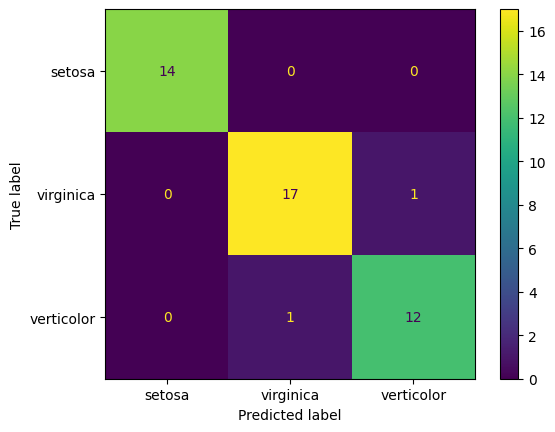

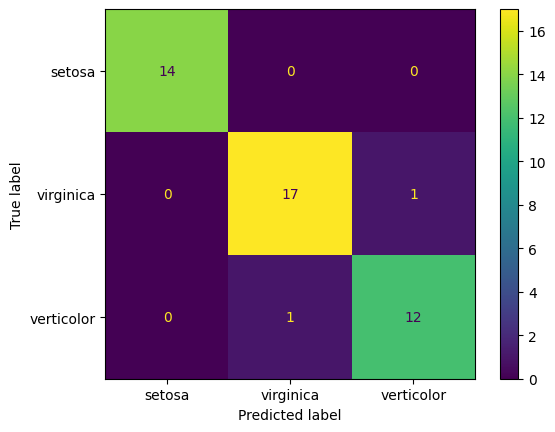

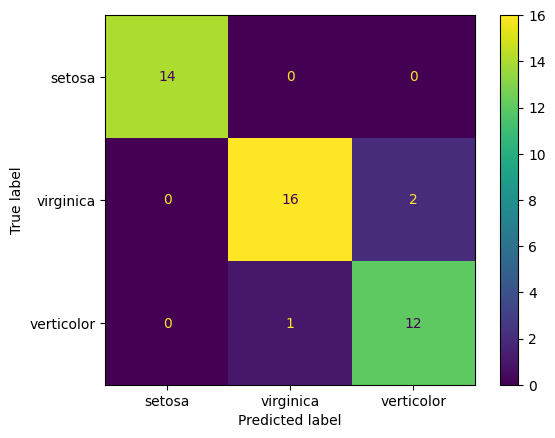

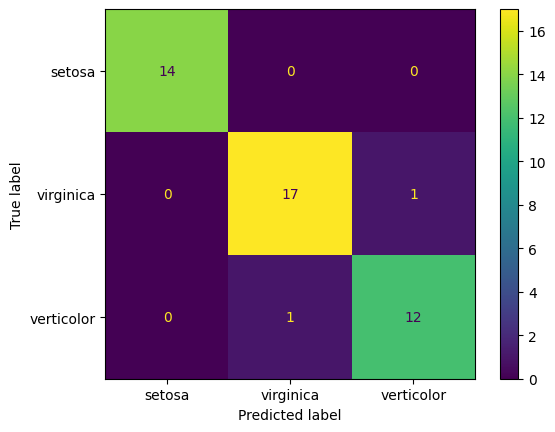

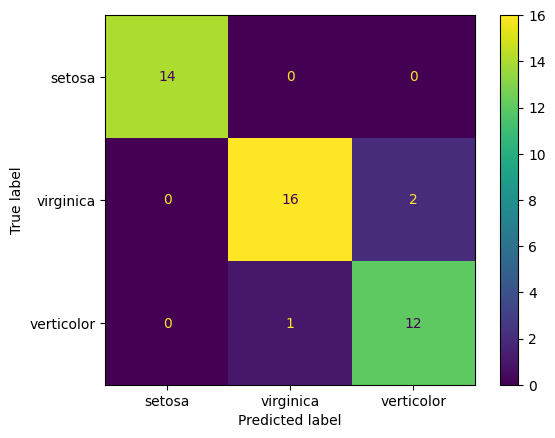

In [1]:
import pandas as pd
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

df = pd.read_csv("iris.csv")

all_inputs = df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].values
all_classes = df['species'].values

(train_set, test_set, train_classes, test_classes) = train_test_split(all_inputs, all_classes, train_size=0.7, random_state=1)

nca = NeighborhoodComponentsAnalysis(random_state=1)

# -------------------------------------------------------------------------------------------------------------------------------

dtc = tree.DecisionTreeClassifier()
dtc.fit(train_set, train_classes)
print("DD:", dtc.score(test_set, test_classes))

predictions = dtc.predict(test_set)
confmtx = confusion_matrix(test_classes, predictions)
plot = ConfusionMatrixDisplay(confusion_matrix = confmtx, display_labels = ["setosa", "virginica", "verticolor"])
plot.plot()

# -------------------------------------------------------------------------------------------------------------------------------

knn3 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
nca_pipe3 = Pipeline([('nca', nca), ('knn3', knn3)])
nca_pipe3.fit(train_set, train_classes)  
print("kNN3: ", nca_pipe3.score(test_set, test_classes))

predictions = nca_pipe3.predict(test_set)
confmtx = confusion_matrix(test_classes, predictions)
plot = ConfusionMatrixDisplay(confusion_matrix = confmtx, display_labels = ["setosa", "virginica", "verticolor"])
plot.plot()

# -------------------------------------------------------------------------------------------------------------------------------

knn5 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
nca_pipe5 = Pipeline([('nca', nca), ('knn5', knn5)])
nca_pipe5.fit(train_set, train_classes) 
print("kNN5: ", nca_pipe3.score(test_set, test_classes))

predictions = nca_pipe5.predict(test_set)
confmtx = confusion_matrix(test_classes, predictions)
plot = ConfusionMatrixDisplay(confusion_matrix = confmtx, display_labels = ["setosa", "virginica", "verticolor"])
plot.plot()

# -------------------------------------------------------------------------------------------------------------------------------

knn11 = KNeighborsClassifier(n_neighbors=11, metric='euclidean')
nca_pipe11 = Pipeline([('nca', nca), ('knn11', knn11)])
nca_pipe11.fit(train_set, train_classes) 
print("kNN11: ",nca_pipe3.score(test_set, test_classes))

predictions = nca_pipe11.predict(test_set)
confmtx = confusion_matrix(test_classes, predictions)
plot = ConfusionMatrixDisplay(confusion_matrix = confmtx, display_labels = ["setosa", "virginica", "verticolor"])
plot.plot()

# -------------------------------------------------------------------------------------------------------------------------------

gnb = GaussianNB()
gnb.fit(train_set, train_classes)
print("NB: ", str(gnb.score(test_set, test_classes))[0:5])

predictions = gnb.predict(test_set)
confmtx = confusion_matrix(test_classes, predictions)
plot = ConfusionMatrixDisplay(confusion_matrix = confmtx, display_labels = ["setosa", "virginica", "verticolor"])
plot.plot()


plt.show()

Nasz output daje nam procent skuteczności dla:

1. Drzewa decyzyjnego
2. k-NN 3, 5 i 11
3. Klasyfikator Naive Bayes

Metoda drzewa i metoda k-najbliższych sąsiadów dają bardzo porównywalne wyniki, a nasze k nie wydaje się mieć na nie dużego wpływu.
Metoda Naive Bayes jest minimalnie gorsza.